In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn import svm


In [150]:
train=pd.read_csv(r"D:\Data_Sets\TITANIC\train.csv")
test = pd.read_csv(r'D:\Data_Sets\TITANIC\test.csv')


In [151]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

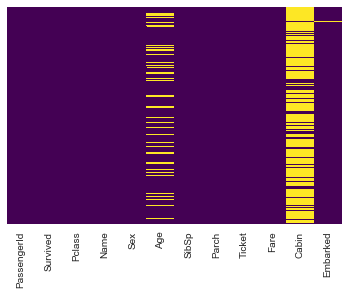

In [154]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


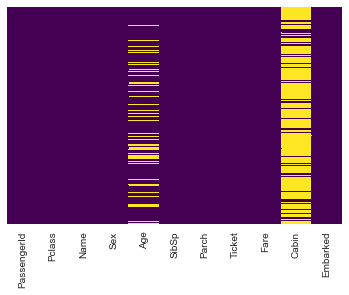

In [155]:
sn.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')


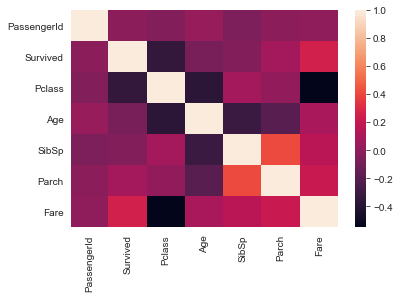

In [156]:
sn.heatmap(train.corr())

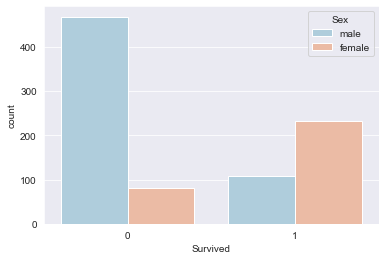

In [157]:
sn.set_style('darkgrid')
sn.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

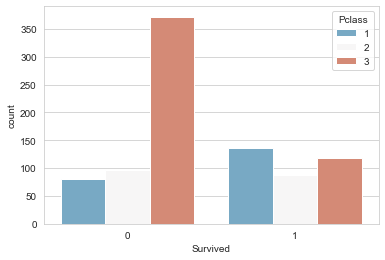

In [158]:
sn.set_style('whitegrid')
sn.countplot(x='Survived', hue='Pclass', data=train, palette='RdBu_r')

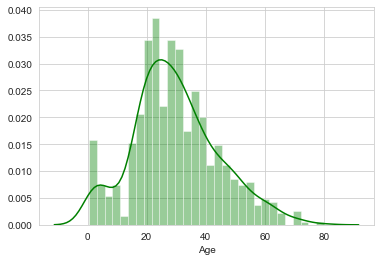

In [159]:
sn.distplot(train['Age'].dropna(),bins=30,color='Green')

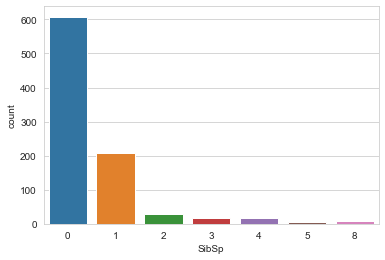

In [160]:
sn.countplot(x='SibSp',data=train)

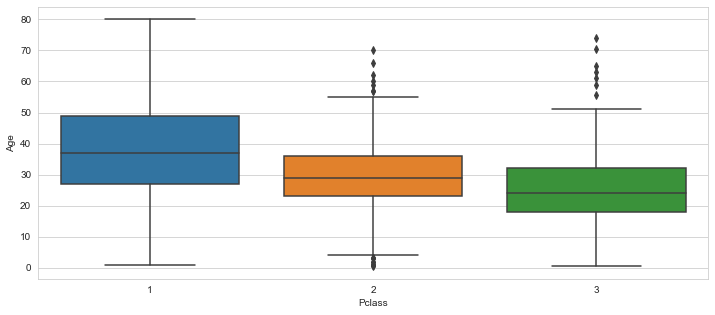

In [161]:
plt.figure(figsize=(12,5))
sn.boxplot(x='Pclass',y='Age',data=train)

In [162]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [163]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis = 1)

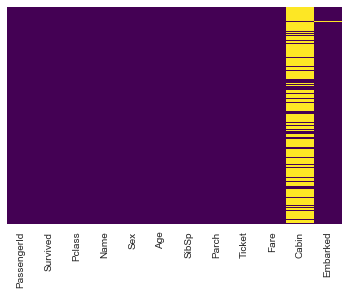

In [164]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

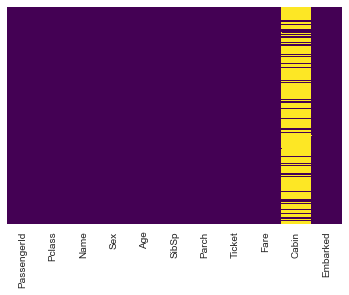

In [165]:
sn.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [166]:
train=train.drop('Cabin' , axis=1)
test=test.drop('Cabin' , axis=1)


In [167]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [168]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

#drop the sex,embarked,name and tickets columns

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#concatenate new sex and embark column to our train dataframe

train = pd.concat([train,sex,embark],axis=1)

#check the head of dataframe

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [169]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

#drop the sex,embarked,name and tickets columns

test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#concatenate new sex and embark column to our train dataframe

test = pd.concat([test,sex,embark],axis=1)

#check the head of dataframe

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.20, random_state=101)

In [172]:
#SVM
classifier = svm.SVC(kernel='linear')

classifier.fit(X_train , y_train)



In [175]:
print(classifier.score(X_test , y_test ))

prediction = classifier.predict(X_test)

0.8044692737430168


In [137]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

E:\Anaconda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
Predictions = logmodel.predict(X_test)

In [139]:

Predictions = logmodel.predict(X_test)
Predictions
# p=pd.DataFrame(y_test,Predictions)
# h=p.head(40)
# h
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.83      0.65      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [140]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,Predictions))

[[88 11]
 [28 52]]


In [176]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
male           0
Q              0
S              0
dtype: int64

In [177]:
test['Fare'].fillna((test['Fare'].mean()), inplace=True)

In [178]:
Test_prediction = classifier.predict(test)

In [179]:
Submission = test.drop(['Pclass','Age','SibSp','Parch','Fare','male','Q','S'],axis = 1)

In [180]:
Submission['Survived'] = Test_prediction 

In [181]:
Submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [182]:
Submission.to_csv('Submission.csv')

In [183]:
len(Submission)

418